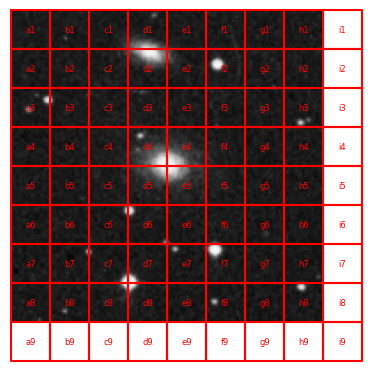

<ipython-input-31-0e81cd76ffd0>:95: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax_cell = plt.subplot(num_cells_y, num_cells_x, (y // cell_size) * num_cells_x + (x // cell_size) + 1)


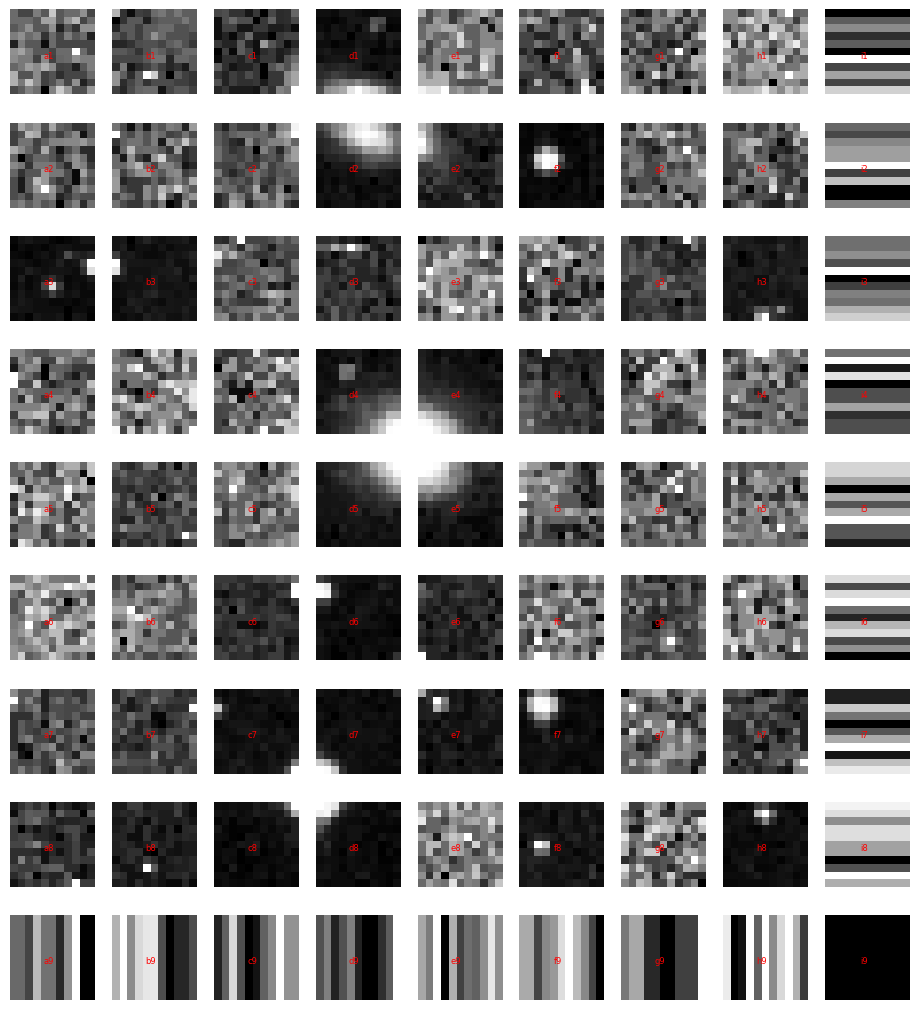

Celda d2 - Contraste: 3947.82958984375


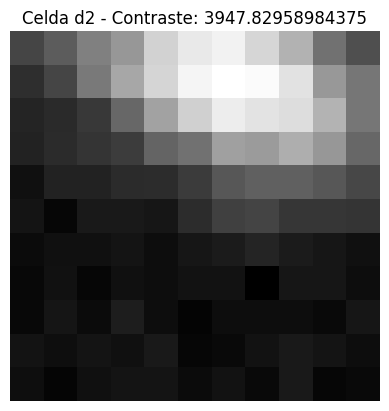

Celda e5 - Contraste: 3483.029052734375


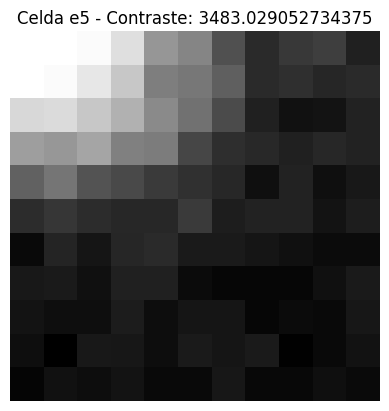

Celda e4 - Contraste: 3226.711181640625


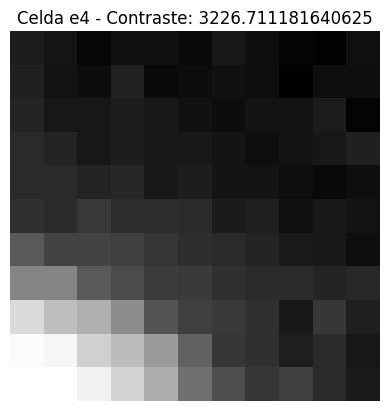

Celda f7 - Contraste: 3116.539306640625


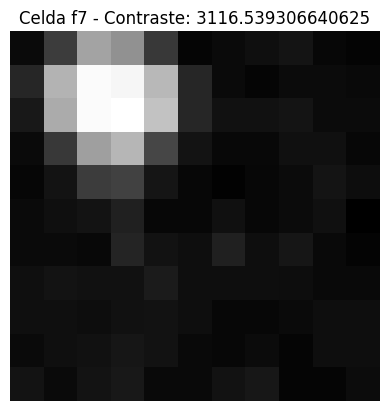

Celda d4 - Contraste: 2864.8056640625


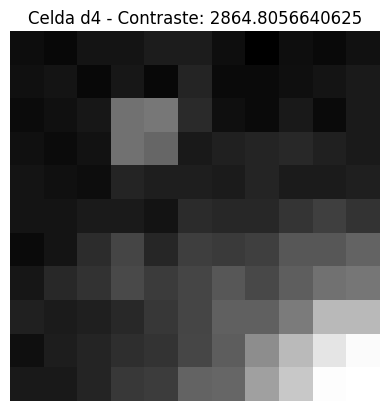

In [31]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import json


def generar_info_guardar_csv(nombre_archivo_fits):
    # Colocar archivo FITS indicando el nombre
    with fits.open(nombre_archivo_fits) as archivo_fits:
        # Extraer los datos de la primera extensión (extensión 0) de la imagen FITS
        datos_imagen = archivo_fits[0].data
        archivo_fits.close()

    # Aquí puedes agregar el código para generar la información de las celdas y guardarla en un archivo CSV
    # Por ejemplo, asumamos que queremos guardar la información en un archivo llamado 'output.csv'
    # Puedes reemplazar esta parte con la lógica específica que necesitas.

    # En este ejemplo, simplemente imprimiremos la información para demostrar que se ha generado correctamente.
    print(datos_imagen)


def visualizar_y_dividir_imagen(datos_imagen, divisiones):
    # Obtener el tamaño de la imagen
    height, width = datos_imagen.shape

    # Calcular el tamaño de las celdas
    cell_size_y = height // divisiones
    cell_size_x = width // divisiones

    # Lista para almacenar la información de las celdas
    celdas_info = []

    # Visualizar la imagen con divisiones y etiquetas
    plt.imshow(datos_imagen, cmap='gray')

    # Deshabilitar los ejes del gráfico
    plt.axis('off')

    # Dividir la imagen en celdas y asignar nombres siguiendo el patrón de cuadrados de ajedrez para mejor orientación
    for y in range(0, height, cell_size_y):
        for x in range(0, width, cell_size_x):
            cell_data = datos_imagen[y:y + cell_size_y, x:x + cell_size_x]
            cell_name = f"{chr(x // cell_size_x + 97)}{y // cell_size_y + 1}"  # Usamos las letras a, b, c, ... y los números 1, 2, 3, ... como nombres
            celdas_info.append((cell_name, x, y, x + cell_size_x, y + cell_size_y))

            # Dibujamos las líneas de los bordes de las celdas
            plt.plot([x, x + cell_size_x, x + cell_size_x, x, x], [y, y, y + cell_size_y, y + cell_size_y, y], color='red')

            # Mostrar el nombre de la celda en el centro
            plt.text(x + cell_size_x // 2, y + cell_size_y // 2, cell_name, color='red', fontsize=6, ha='center', va='center')

    plt.show()
    return celdas_info


def visualizar_y_dividir_reduccion(datos_imagen, divisiones):
    # Reducir la imagen
    reduced_image_data = datos_imagen[::2, ::2]

    # Tamaño de celda para la imagen reducida
    cell_size = min(reduced_image_data.shape) // divisiones

    # Obtener las dimensiones de la imagen reducida
    height, width = reduced_image_data.shape

    # Calcular el número de celdas en filas y columnas
    num_cells_x = width // cell_size
    num_cells_y = height // cell_size

    # Ajustar num_cells_x y num_cells_y si no están completamente llenos
    if width % cell_size != 0:
        num_cells_x += 1
    if height % cell_size != 0:
        num_cells_y += 1

    # Configurar la figura principal para ocupar toda la pantalla sin bordes blancos
    fig = plt.figure(figsize=(num_cells_x, num_cells_y + 1), dpi=100)
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

    # Visualizar la imagen completa sin los números y ejes de tipo gráfico
    ax_image = plt.subplot(1, 1, 1)
    ax_image.imshow(reduced_image_data, cmap='gray', extent=[0, width, 0, height])
    ax_image.axis('off')

    # Lista para almacenar la información de las celdas
    celdas_info = []

    # Dividir la imagen en celdas y asignar nombres siguiendo el patrón de cuadrados de ajedrez
    for y in range(0, height, cell_size):
        for x in range(0, width, cell_size):
            cell_data = reduced_image_data[y:y + cell_size, x:x + cell_size]
            cell_name = f"{chr(x // cell_size + 97)}{y // cell_size + 1}"  # Usamos las letras a, b, c, ... y los números 1, 2, 3, ... como nombres
            celdas_info.append((cell_name, x, y, x + cell_size, y + cell_size))

            ax_cell = plt.subplot(num_cells_y, num_cells_x, (y // cell_size) * num_cells_x + (x // cell_size) + 1)
            ax_cell.imshow(cell_data, cmap='gray', extent=[x, x + cell_size, y, y + cell_size])
            ax_cell.text(x + cell_size // 2, y + cell_size // 2, cell_name, color='red', fontsize=6, ha='center', va='center')
            ax_cell.axis('off')

    plt.show()
    return celdas_info, reduced_image_data


def generar_info_guardar_json(reduced_image_data, cell_size):
    # Obtener las dimensiones de la imagen reducida
    height, width = reduced_image_data.shape

    # Crear una lista para almacenar la información de las celdas
    cell_info_list = []

    # Dividir la imagen en celdas y asignar nombres siguiendo el patrón de cuadrados de ajedrez
    for y in range(0, height, cell_size):
        for x in range(0, width, cell_size):
            cell_data = reduced_image_data[y:y + cell_size, x:x + cell_size].tolist()  # Convertir a lista para guardar en JSON
            cell_name = f"{chr(x // cell_size + 97)}{y // cell_size + 1}"
            cell_info = {
                'name': cell_name,
                'x': x,
                'y': y,
                'data': cell_data
            }
            cell_info_list.append(cell_info)

    # Guardar la información de las celdas en un archivo JSON
    with open('cell_info.json', 'w') as jsonfile:
        json.dump(cell_info_list, jsonfile)


def calcular_metrica_ordenar_celdas():
    # Leer la información de las celdas desde el archivo JSON
    with open('cell_info.json', 'r') as jsonfile:
        cell_info_list = json.load(jsonfile)

    # Calcular la métrica de diferencia de contrastes para cada celda (en este caso, la desviación estándar)
    for cell_info in cell_info_list:
        cell_data = np.asarray(cell_info['data'], dtype=np.float32)  # Convertir a una matriz numérica
        cell_data = cell_data[np.isfinite(cell_data)]  # Filtrar valores no numéricos
        contrast_metric = np.std(cell_data)  # Calcular la desviación estándar de los valores de píxeles dentro de la celda
        cell_info['contrast_metric'] = contrast_metric

    # Ordenar la lista de celdas según la métrica de diferencia de contrastes en orden descendente
    cell_info_list.sort(key=lambda x: x['contrast_metric'], reverse=True)
    return cell_info_list


def mostrar_celdas_mayor_contraste(cell_info_list, N):
    # Seleccionar las N celdas con mayor diferencia de contrastes
    cells_of_interest = cell_info_list[:N]

    for cell_info in cells_of_interest:
        print(f"Celda {cell_info['name']} - Contraste: {cell_info['contrast_metric']}")

        # Obtener las coordenadas x e y de la celda
        x = cell_info['x']
        y = cell_info['y']

        # Obtener los datos de la celda de la imagen reducida
        cell_data = np.asarray(cell_info['data'], dtype=np.float32)

        # Visualizar la celda seleccionada en una nueva figura
        plt.figure()
        plt.imshow(cell_data, cmap='gray')
        plt.title(f"Celda {cell_info['name']} - Contraste: {cell_info['contrast_metric']}")
        plt.axis('off')
        plt.show()

# Cargar los datos de la imagen FITS
nombre_archivo_fits = 'NGC_0001_I_103aE_dss1.fits'
with fits.open(nombre_archivo_fits) as archivo_fits:
    datos_imagen = archivo_fits[0].data

# Definir la cantidad de divisiones deseada
divisiones = 8

# Llamar a la función para obtener la información de las celdas
celdas_info = visualizar_y_dividir_imagen(datos_imagen, divisiones)

# Llamar a la función para visualizar y dividir la imagen reducida
celdas_info, reduced_image_data = visualizar_y_dividir_reduccion(datos_imagen, divisiones)

# Luego, puedes llamar a las funciones que necesitas, por ejemplo:
# Generar información y guardarla en JSON
cell_size = min(reduced_image_data.shape) // divisiones
generar_info_guardar_json(reduced_image_data, cell_size)

# Calcular métrica y ordenar celdas
cell_info_list = calcular_metrica_ordenar_celdas()

# Mostrar las N celdas con mayor diferencia de contrastes
N = 5
mostrar_celdas_mayor_contraste(cell_info_list, N)
